In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 24

## Estimation

In [ ]:
# Compensation data for employees of the city of San Francisco in 2015
sf = Table.read_table('san_francisco_2015.csv')
sf

In [ ]:
# Look at the Mayor's salary 
# (lot of other interesting things you can look at in the data too)


In [ ]:
# distribution of SF employee total compensation



In [ ]:
# Median total compensation of SF employees (population parameter)



In [ ]:
# suppose we only had a sample of 300 employees


In [ ]:
# Let's look at the empirical distribution of our sample


In [ ]:
# let's get the population median



## The Bootstrap

In [ ]:
# resample from our original sample to get a bootstrap sample


In [ ]:
# calculate the median from our bootstrap sample (i.e., get a bootstrap statistic)


In [ ]:
# get a full bootstrap distribution
def bootstrap_median(original_sample, label, replications):
    """Simulate sample median:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    Returns array of bootstrap sample medians
    """
    
    
    
    
    
    
    

In [ ]:
# get a bootstrap distribution with 2000 bootstrap statistics from our one sample


In [ ]:
# visualize the bootstrap distribution






In [ ]:
# get a range of plausible values for where the population parameter could be
# (i.e., get a confidence interval)





In [ ]:
# plot the bootstrap distribution with the range of plausiable values





## A confidence interval for the average age of mothers

In [3]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


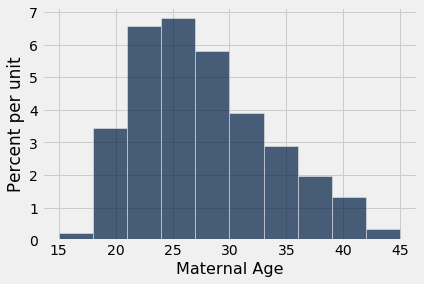

In [9]:
# visuialize mother's ages


In [ ]:
# calculate the mean age of mothers 


In [10]:
# Bootstrap for sample mean






In [11]:
# create a 95% confidence interval



array([26.88841567, 27.57069847])

95% Confidence interval for mean maternal age in population:
[26.888 27.571]


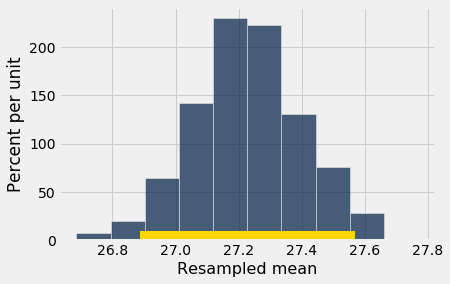

In [12]:
# visualize the bootstrap distribution and the 95% confidence interval






In [7]:
# create a 80% confidence interval



array([27.01277683, 27.45826235])

80% Confidence interval for mean maternal age in population:
[27.013 27.458]


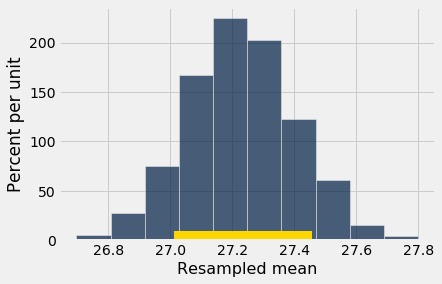

In [8]:
# visualize the bootstrap distribution and the 80% confidence interval





In [13]:
# Use confidence intervals to run a hypothesis test
# Null:  
# Alt: 



array([26.88841567, 27.57069847])